### 92. Reverse Linked List II

* https://leetcode.com/problems/reverse-linked-list-ii/description/

### ['Bloomberg', 'Meta', 'Amazon', 'Apple', 'Uber']

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def reverseBetween(self, head, left: int, right: int):
        if not head or left >= right:
            return head

        dummy = ListNode(0, head)
        prev = dummy

        for _ in range(left-1):
            prev = prev.next

        head = prev.next

        for _ in range(right - left):
            nn = head.next
            head.next = nn.next
            nn.next = prev.next
            prev.next = nn

        return dummy.next

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def reverseBetween(self, head, left: int, right: int):
        if left >= right:
            return head
        dummy = ListNode(0, head)
        count = 0
        prev_grp = prev = dummy

        while count < (left-1):
            prev, head = head, head.next
            count += 1
            prev_grp = prev

        while count < right:
            nn = head.next
            head.next = prev

            prev, head = head, nn
            count += 1

        prev_grp.next.next = head
        prev_grp.next = prev

        return dummy.next

In [6]:
## Credit - https://www.youtube.com/watch?v=ykxvY2ZUfM4

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

    def __repr__(self):
        return f'{self.val}, {self.next}'


def reverse_between(head, left, right):
    if not head or not head.next or left == right:
        return head

    ## reach the left node position
    prev, curr = None, head
    i = 1
    while curr and i != left:
        prev, curr = curr, curr.next
        i += 1

    # Two pointers - one before left and other one at the left node for future pointing
    pointer_to_start = prev
    start = curr

    while curr and i != right+1:
        next = curr.next
        curr.next = prev
        prev = curr
        curr = next
        i += 1
    
    start.next = curr
    if pointer_to_start:
        pointer_to_start.next = prev
    else:
        return prev # if left is 0 then this will become new head

    return head


In [7]:
root = ListNode(1)
root.next = ListNode(2)
root.next.next = ListNode(3)
root.next.next.next = ListNode(4)
root.next.next.next.next = ListNode(5)


reverse_between(root, 2, 4)

1, 4, 3, 2, 5, None

          Category  Value  Percentage
0           Stocks     60        37.5
1              MFs     40        25.0
2   Long Term Debt     40        25.0
3  Short Term Debt     20        12.5


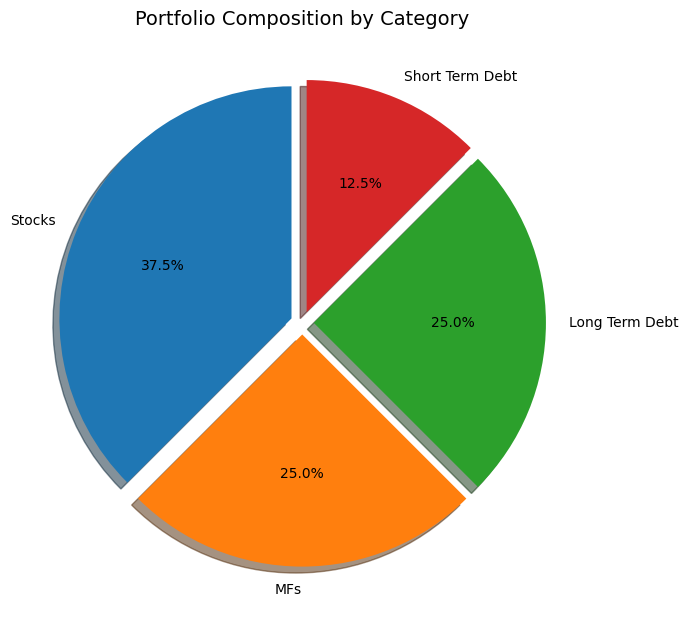

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = {
    'Category': ['Stocks', 'MFs', 'Long Term Debt', 'Short Term Debt'],
    'Value': [60, 40, 40, 20]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate percentage
df['Percentage'] = (df['Value'] / df['Value'].sum()) * 100

# Display the DataFrame
print(df)

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(df['Value'], 
        labels=df['Category'], 
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=True, 
        explode=[0.05]*len(df), 
        textprops={'fontsize': 10})
plt.title('Portfolio Composition by Category', fontsize=14)
plt.tight_layout()
plt.show()
